<a href="https://colab.research.google.com/github/2yeonsong/MachineLearning/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**과제 1.**
---

타이타닉 데이터 세트 (이진분류)

https://www.kaggle.com/competitions/titanic/data
타이타닉 데이터 세트를 이용하여
* SGD분류,
* 결정트리,
* 랜덤포래스트,
* 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화.

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
titanic_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
titanic_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

In [3]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## 1. SGD분류

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt

# Titanic 데이터셋 불러오기
titanic_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
titanic_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

In [11]:
# 불필요한 열 제거
titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 입력 데이터 수정
# 누락된 값 다루기
# NaN값을 처리하기 위해서 fillna 메서드를 사용
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True) #  Age 열의 NaN 값을 해당 열의 평균값으로 대체
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True) # Embarked 열의 NaN 값을 해당 열의 가장 자주 등장하는 값인 mode로 대체
titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace=True) #Age 열의 NaN 값을 해당 열의 평균값으로 대체
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True) # Fare 열의 NaN 값을 해당 열의 평균값으로 대체

# 범주형 변수를 숫자로 변환하기 (원핫 인코딩 -> 특성공학)
titanic_train = pd.get_dummies(titanic_train, columns=['Sex', 'Embarked'], drop_first=True)
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True)

# 데이터를 훈련 및 테스트 세트로 나누기
# Survived 열은 훈련 데이터에서 모델이 예측 하려는 목표 값이기 때문에 모델이 스스로 Survived값을 예측하도록 Survived열을 제거 했음
X = titanic_train.drop('Survived', axis=1)

# Survived 열을 독립변수(X)에서 제거하고 종속변수인 타겟(y)으로 따로 저장했음
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=202139826)

In [12]:
# 특성을 표준화하기
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # 평균과 표준편차를 기반으로 스케일링을 수행하며 X_train_scaled에 표준화된 데이터가 저장됨
X_test_scaled = scaler.transform(X_test) # 훈련 데이터에서 얻은 평균과 표준편차를 사용하여 표준화하며 X_test_scaled에 표준화된 테스트 데이터가 저장됨

In [13]:
# SGDClassifier로 모델 훈련하기
sgd = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=202139826)
sgd.fit(X_train_scaled, y_train) # 표준화된 훈련 데이터를 사용하여 모델을 훈련

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=202139826, tol=None)

sgd = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=202139826) 에서
1. loss='log' : 로지스틱 회귀 손실 함수를 사용하여 로지스틱 회귀를 수행한다는 뜻이다. 여기서 로지스틱 회귀 손실 함수는 이진 분류의 확률적 문제를 다루기에 적합한 손실 함수이기 때문에 선택했다.
2. max_iter=100 : 경사 하강법의 최대 반복 횟수를 100으로 설정했다는 뜻으로 max_iter가 너무 낮으면 수렴하지 않을 수 있으며, 너무 높으면 계산 시간이 오래 걸릴 수 있으므로 적절히 선택하면 모델이 충분한 횟수로 수렴하면서 과적합을 방지 수 있다.
3. tol=None : tol은 최적화 중지 조건으로, 손실 함수의 감소가 tol 값 미만으로 떨어질 때 최적화를 중지한다. 여기서 tol = None은 중지 조건을 사용하지 않고 max_iter만큼 반복하도록 설정했다.
4. random_state : 랜덤 시드 값으로 재현성을 위해 설정

훈련 정확도: 0.797752808988764
테스트 정확도: 0.7932960893854749


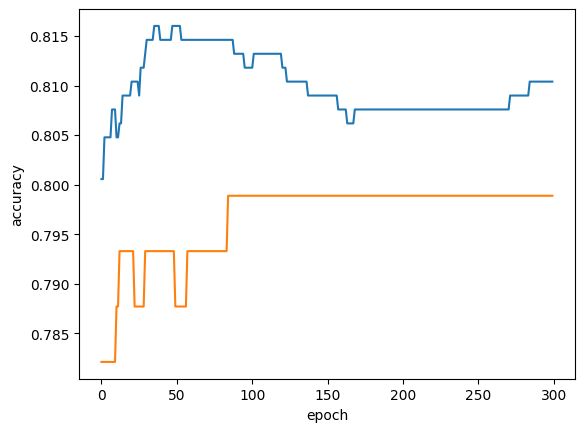

In [14]:
# 모델 평가
train_accuracy = sgd.score(X_train_scaled, y_train) # 훈련 데이터에 대한 정확도를 계산
test_accuracy = sgd.score(X_test_scaled, y_test) # 테스트 데이터에 대한 정확도를 계산
print(f"훈련 정확도: {train_accuracy}")
print(f"테스트 정확도: {test_accuracy}")

# 학습 곡선 그리기
train_scores = []
test_scores = []
classes = np.unique(y_train)

for _ in range(300):
    sgd.partial_fit(X_train_scaled, y_train, classes=classes)
    train_scores.append(sgd.score(X_train_scaled, y_train))
    test_scores.append(sgd.score(X_test_scaled, y_test))

plt.plot(train_scores)
plt.plot(test_scores)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 2. 결정트리

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
titanic_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
titanic_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

# 데이터 전처리
# 'Sex' 열을 이진수로 인코딩
label_encoder = LabelEncoder()
titanic_train['Sex'] = label_encoder.fit_transform(titanic_train['Sex'])
titanic_test['Sex'] = label_encoder.transform(titanic_test['Sex'])

# 결측치 처리('Age'와 'Fare'의 결측치를 평균값으로 대체)
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace=True)
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)

# 새로운 특성 추가
# FamilySize는 가족의 크기를 나타내며 "SibSp" (동승한 형제자매/배우자 수)와 "Parch" (동승한 부모/자녀 수) 두 가지 기존 특성을 합하여 생성
# 가족 구성원의 수는 생존 여부에 영향을 미치기도 하고 데이터의 차원을 줄이면 모델의 복잡성을 감소시킬 수 있으므로 특성을 추가했음
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch']
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch']

# 훈련 데이터와 테스트 데이터를 준비
# Survived 열이 종속 변수이며 생존 여부를 나타내고 다른 열을 독립 변수로 사용됨
# 종속 변수는 모델이 예측하려는 대상
X = titanic_train[['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare']]
y = titanic_train['Survived']

X_test = titanic_test[['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare']]

# 훈련 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=202139826)

# 결정 트리 모델 생성 및 훈련
dt = DecisionTreeClassifier(random_state=202139826)
dt.fit(X_train, y_train)

# 모델 성능 평가
train_score = dt.score(X_train, y_train)
val_score = dt.score(X_val, y_val)

print("훈련 데이터 정확도:", train_score)
print("검증 데이터 정확도:", val_score)

# 테스트 데이터로 예측
predictions = dt.predict(X_test)

훈련 데이터 정확도: 0.9831460674157303
검증 데이터 정확도: 0.7988826815642458


## 3. 랜덤포래스트

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
titanic_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
titanic_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

# 데이터 전처리를 위해 train과 test 데이터를 합침
titanic_data = pd.concat([titanic_train, titanic_test], axis=0, ignore_index=True)

# 데이터 전처리
# 'Sex'와 'Embarked' 열을 인코딩
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
# 'Embarked' 열의 NaN 값은 'S'로 대체 (가장 빈도가 높은 값을 사용하여 범주형 데이터의 결측치를 처리)
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'].fillna('S'))

# 새로운 특성 추가('SibSp'와 'Parch'를 합쳐 'FamilySize'라는 새로운 특성을 만듦)
# FamilySize는 가족의 크기를 나타내며 "SibSp" (동승한 형제자매/배우자 수)와 "Parch" (동승한 부모/자녀 수) 두 가지 기존 특성을 합하여 생성
# 가족 구성원의 수는 생존 여부에 영향을 미치기도 하고 데이터의 차원을 줄이면 모델의 복잡성을 감소시킬 수 있으므로 특성을 추가했음
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

# 'Age'와 'Fare' 열의 누락된 값을 중앙값으로 채움
imputer = SimpleImputer(strategy='median')
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])
titanic_data['Fare'] = imputer.fit_transform(titanic_data[['Fare']])

# 모델 학습에 사용할 특성을 선택
# 생존 여부(Survived)를 예측하기 위해 중요한 정보를 담고 있기 때문에 선택했음
features = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']

# 데이터를 다시 훈련 세트와 테스트 세트로 분리
train_data = titanic_data[:len(titanic_train)]
test_data = titanic_data[len(titanic_train):]

X = train_data[features]
y = titanic_train['Survived']

# 학습 데이터를 train과 검증 세트로 나눔
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=202139826)

# 랜덤 포레스트 분류기를 학습
rf = RandomForestClassifier(random_state=202139826)
rf.fit(X_train, y_train)

# 검증 세트에서 모델의 정확도를 평가
y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("검증 정확도:", accuracy)

# 테스트 세트에서 예측
X_test = test_data[features]
test_predictions = rf.predict(X_test)

검증 정확도: 0.8100558659217877


## 4. 히스토그램기반 그래디언트 부스팅

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# 데이터 불러오기
titanic_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
titanic_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
gender_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

# 새로운 특성 추가('SibSp'와 'Parch'를 합쳐 'FamilySize'라는 새로운 특성을 만듦)
# FamilySize는 가족의 크기를 나타내며 "SibSp" (동승한 형제자매/배우자 수)와 "Parch" (동승한 부모/자녀 수) 두 가지 기존 특성을 합하여 생성
# 가족 구성원의 수는 생존 여부에 영향을 미치기도 하고 데이터의 차원을 줄이면 모델의 복잡성을 감소시킬 수 있으므로 특성을 추가했음
# 이는 가족 규모가 생존 여부에 영향을 미칠 수 있는 요소 중 하나일 수 있으며 이 정보를 하나의 특성으로 통합하여 모델에 제공하는 것이 목적
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch']

# 관련 특성과 목표 변수 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
target = 'Survived' # 'target'는 모델이 예측하려는 목표 변수인 'Survived' 열을 나타냄
titanic = titanic_train[features + [target]]

# 결측치 처리
titanic['Age'].fillna(titanic['Age'].median(), inplace=True) # NaN 값을 처리하기 위해 'Age' 열의 NaN 값을 중간값(median)으로 대체
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True) # 'Embarked' 열의 NaN 값을 최빈값(mode)으로 대체

# 범주형 변수를 숫자형으로 변환
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'])

# 데이터를 훈련 및 테스트 세트로 나누기
X = titanic.drop(target, axis=1)
y = titanic[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=202139826)

# 히스토그램 기반 그래디언트 부스팅 분류기 생성
hgb = HistGradientBoostingClassifier(random_state=202139826)

# 모델을 훈련 데이터에 적합
hgb.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = hgb.predict(X_test)

# 정확도 계산
정확도 = accuracy_score(y_test, y_pred)
print("정확도:", 정확도)

# GridSearchCV를 사용한 하이퍼파라미터 튜닝 수행
param_grid = {
    'max_iter': [100, 200, 300], # 'max_iter': 훈련의 최대 반복 횟수를 지정한다. [100, 200, 300] 세 가지 다른 값으로 시도하며, 모델이 얼마나 많은 반복을 허용할지를 결정
    'max_leaf_nodes': [15, 31, 63], # 'max_leaf_nodes': 각 트리의 최대 리프 노드 개수를 지정한다. [15, 31, 63] 세 가지 다른 값으로 시도하며, 트리의 복잡성을 제어
    'min_samples_leaf': [1, 2, 4] # 'min_samples_leaf': 리프 노드에서 허용되는 최소 샘플 수를 나타낸다. [1, 2, 4] 세 가지 다른 값으로 시도하며, 과적합을 방지하기 위해 사용
}

grid_search = GridSearchCV(hgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 얻기
best_params = grid_search.best_params_
print("최적 하이퍼파라미터:", best_params)

# 최적 하이퍼파라미터를 사용하여 모델을 훈련
best_hgb = HistGradientBoostingClassifier(random_state=202139826, **best_params)
best_hgb.fit(X_train, y_train)

# 최적 모델로 테스트 데이터에 대한 예측 수행
y_pred = best_hgb.predict(X_test)

# 최적 모델로 정확도 계산
정확도 = accuracy_score(y_test, y_pred)
print("최적 모델의 정확도:", 정확도)

<ipython-input-18-9ab9cab9dc2c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'].fillna(titanic['Age'].median(), inplace=True) # NaN 값을 처리하기 위해 'Age' 열의 NaN 값을 중간값(median)으로 대체
<ipython-input-18-9ab9cab9dc2c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True) # 'Embarked' 열의 NaN 값을 최빈값(mode)으로 대체


정확도: 0.8268156424581006
최적 하이퍼파라미터: {'max_iter': 100, 'max_leaf_nodes': 15, 'min_samples_leaf': 4}
최적 모델의 정확도: 0.8044692737430168
